In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-28 07:44:35,979: Credentials are already in use. The existing account in the session will be replaced.


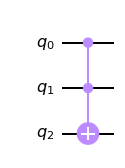

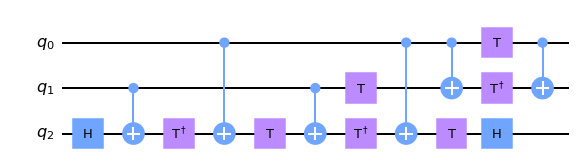

In [3]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)

display(qc_and.draw())

qc_and.decompose().draw()

In [4]:
from qiskit.tools.monitor import job_monitor

In [5]:
def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

In [6]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

In [10]:
provider = IBMQ.get_provider(hub ='ibm-q', group='open', project='main')
backend = provider.get_backend('ibm_nairobi')

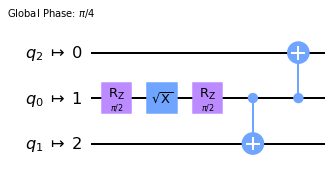

In [11]:
transpile(qc, backend).draw(output='mpl', idle_wires=False)

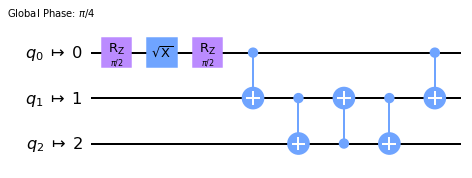

In [18]:
transpile(qc, backend, optimization_level = 0).draw(output='mpl', idle_wires=False)